<a href="https://colab.research.google.com/github/knysmchr/colab_sample/blob/main/exercise_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/2021_Data_Science ML_with_20+Practical_Hands-On_Projects_and_Deployment/auto-mpg.csv')

In [5]:
# Drop column 'name'
df = df.drop('name', axis=1)

In [9]:
# Confirm info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


In [13]:
# Describe df
print('describe all')
display(df.describe().T)
print('describe df["origin"] == 1')
display(df[df['origin'] == 1].describe().T)
print('describe  df["origin"] == 2')
display(df[df['origin'] == 2].describe().T)
print('describe  df["origin"] == 3')
display(df[df['origin'] == 3].describe().T)

describe all


,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displ,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
accel,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


describe df["origin"] == 1


,count,mean,std,min,25%,50%,75%,max
mpg,245.0,20.033469,6.440384,9.0,15.0,18.5,24.0,39.0
cyl,245.0,6.277551,1.655996,4.0,4.0,6.0,8.0,8.0
displ,245.0,247.512245,98.376347,85.0,151.0,250.0,318.0,455.0
hp,245.0,119.048980,39.897790,52.0,88.0,105.0,150.0,230.0
weight,245.0,3372.489796,795.346690,1800.0,2720.0,3381.0,4055.0,5140.0
accel,245.0,14.990204,2.736020,8.0,13.0,15.0,16.7,22.2
yr,245.0,75.591837,3.660368,70.0,73.0,76.0,78.0,82.0
origin,245.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


describe  df["origin"] == 2


,count,mean,std,min,25%,50%,75%,max
mpg,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
cyl,68.0,4.161765,0.506975,4.0,4.00,4.0,4.000,6.0
displ,68.0,109.632353,22.693220,68.0,94.75,105.0,121.000,183.0
hp,68.0,80.558824,20.157871,46.0,69.75,76.5,90.000,133.0
weight,68.0,2433.470588,491.813867,1825.0,2071.75,2240.0,2803.750,3820.0
accel,68.0,16.794118,3.087813,12.2,14.50,15.6,19.125,24.8
yr,68.0,75.676471,3.422669,70.0,73.00,76.0,78.250,82.0
origin,68.0,2.000000,0.000000,2.0,2.00,2.0,2.000,2.0


describe  df["origin"] == 3


,count,mean,std,min,25%,50%,75%,max
mpg,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
cyl,79.0,4.101266,0.590414,3.0,4.0,4.0,4.00,6.0
displ,79.0,102.708861,23.140126,70.0,86.0,97.0,119.00,168.0
hp,79.0,79.835443,17.819199,52.0,67.0,75.0,95.00,132.0
weight,79.0,2221.227848,320.497248,1613.0,1985.0,2155.0,2412.50,2930.0
accel,79.0,16.172152,1.954937,11.4,14.6,16.4,17.55,21.0
yr,79.0,77.443038,3.650595,70.0,74.0,78.0,81.00,82.0
origin,79.0,3.000000,0.000000,3.0,3.0,3.0,3.00,3.0


In [14]:
# Replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


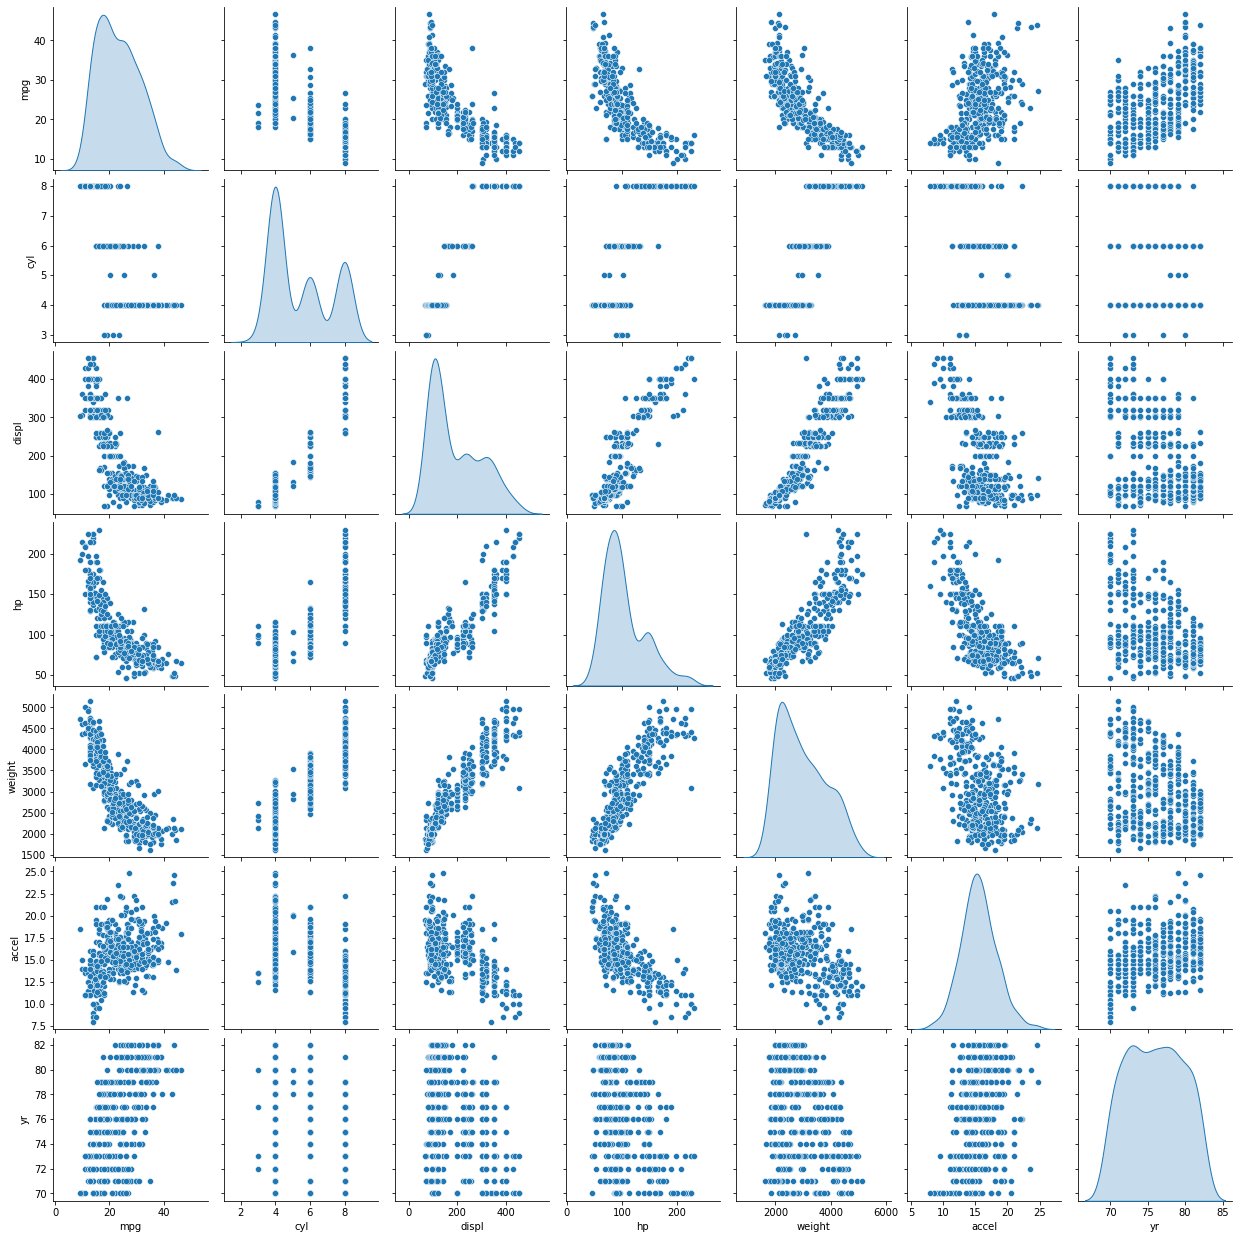

In [17]:
# dist and corr
sns.pairplot(df.iloc[:, 0:7], diag_kind='kde')

**Derive insights from each Exploratory Data Analysis you will**

American cars are heavier, but have more horsepower, more cylinders, and larger engines. Therefore, the fuel consumption is low. European cars and Asian cars are lighter in weight to improve fuel economy.Asian cars are notable for their characteristics.

In [18]:
# Divide data
X = df.drop(['mpg', 'origin_europe'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
# Build & Fit
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
# find coef and intercept
for index, col_name in enumerate(X_train.columns):
  print('Coefficient of {} is {}'.format(col_name, model.coef_[0][index]))

print('The intercept for our model is {}'.format(model.intercept_[0]))

Coefficient of cyl is -0.23250925374174994
Coefficient of displ is 0.024582595649819582
Coefficient of hp is -0.0014889032367685145
Coefficient of weight is -0.007611882424290502
Coefficient of accel is 0.28013266086228483
Coefficient of yr is 0.7746849712944145
Coefficient of origin_america is -2.5990408304251607
Coefficient of origin_asia is 0.12135510539385683
The intercept for our model is -18.92499588163331


In [24]:
# out of sample score (R^2)
print('R^2(train)', model.score(X_train, y_train))
print('R^2(test)', model.score(X_test, y_test))

R^2(train) 0.8205337631867142
R^2(test) 0.8242172817490034


**Write your final conclusion and observations**

I have come to the conclusion that American cars are distinctive, but the scores are slightly lower than 1 due to similar trends in European and Asian cars.